## Student Performance Indicator

## Problem Statement 
This project understands how student's performance  (test scores) is affected by other variables such as Gender, Ethincity.Parental level of education, Lunch ans test level preparation

## Importing Required Dependencies

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import*
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import* 
from xgboost import XGBRegressor


## Import the CSV data as Pandas DataFrame

In [6]:
df = pd.read_csv("StudentsPerformance.csv")

In [8]:
# First Five Recors Of Data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Check Whether Data Contain Any Missing Values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values 

In [10]:
# Check Whether Any Duplicates If There Try to remove those duplicates
df.duplicated().sum()

0

#### There are no duplicates

In [11]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Checkin Number of unique values of each attribute
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# Check Statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Expolring Data

In [19]:
print("Categories in Gender Column:      ",end=" ")
print(df['gender'].unique())
print()

print("Categories in Race/Ethnicity Column:      ",end=" ")
print(df['race/ethnicity'].unique())
print()

print("Categories in Parental Level Of Education Column:      ",end=" ")
print(df['parental level of education'].unique())
print()

print("Categories in Lunch Column:      ",end=" ")
print(df['lunch'].unique())
print()

print("Categories in Test Preparation Course Column:      ",end=" ")
print(df['test preparation course'].unique())


Categories in Gender Column:       ['female' 'male']

Categories in Race/Ethnicity Column:       ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in Parental Level Of Education Column:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in Lunch Column:       ['standard' 'free/reduced']

Categories in Test Preparation Course Column:       ['none' 'completed']


In [32]:
# Define numerical & Categorical features 
numerical_features  = [feature for feature in df.columns if df[feature].dtype =='int64']
Categorical_features  = [feature for feature in df.columns if df[feature].dtype =='object']

In [33]:
print('We have {} numerical features{}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features{}'.format(len(Categorical_features),Categorical_features))

We have 3 numerical features['math score', 'reading score', 'writing score']
We have 5 categorical features['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [38]:
# Adding an extra column namely TOTAL SCORE And Average
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


[]

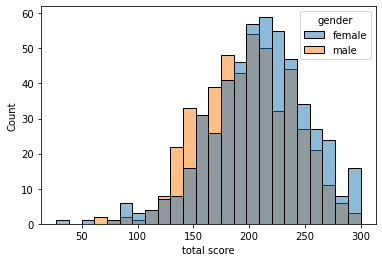

In [58]:
sns.histplot(x='total score',data=df,hue='gender')
plt.plot()

#### This Bar Graph show that majority of students girls are performing well in scoring good marks in test

## Data Transformation

In [71]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['race/ethnicity'] = encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = encoder.fit_transform(df['parental level of education'])
df['lunch'] = encoder.fit_transform(df['lunch'])
df['test preparation course'] = encoder.fit_transform(df['test preparation course'])


#### Splitting Data into independent variables and dependent variables

In [202]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [205]:
print("First Five Rows Independent Variables: ",X[:5,:])
print()
print("First Five Values Dependent Variables: ",Y[:5])

First Five Rows Independent Variables:  [[  0   1   1   1   1  72  72  74 218]
 [  0   2   4   1   0  69  90  88 247]
 [  0   1   3   1   1  90  95  93 278]
 [  1   0   0   0   1  47  57  44 148]
 [  1   2   4   1   1  76  78  75 229]]

First Five Rows Dependent Variables:  [72.66666667 82.33333333 92.66666667 49.33333333 76.33333333]


### Splitting the data into trainig and testing data

In [206]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Let's See Our training data and testing data

In [210]:
print("Fist Five Rows X traing data:",X_train[:5,:])
print("Fist Five Values Y traing data:",Y_train[:5])
print("Fist Five Rows X testing data:",X_test[:5,:])
print("Fist Five Values Y testing data:",Y_test[:5])

Fist Five Rows X traing data: [[  1   3   0   0   1  77  78  73 228]
 [  0   3   3   1   1  74  79  82 235]
 [  1   4   0   1   0  62  56  53 171]
 [  0   2   0   1   1  91  95  94 280]
 [  1   3   1   0   0  61  70  76 207]]
Fist Five Values Y traing data: [76.         78.33333333 57.         93.33333333 69.        ]
Fist Five Rows X testing data: [[  0   3   1   0   1  62  72  74 208]
 [  1   2   0   0   1  87  73  72 232]
 [  1   2   2   0   0  40  46  50 136]
 [  1   3   4   0   1  77  62  64 203]
 [  0   2   4   1   1  69  78  76 223]]
Fist Five Values Y testing data: [69.33333333 77.33333333 45.33333333 67.66666667 74.33333333]


### Standardize the Data 

In [211]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### After transfromation is performed the data looks like

In [212]:
print("Fist Five Rows X traing data:",X_train[:5,:])
print("Fist Five Rows X testing data:",X_test[:5,:])

Fist Five Rows X traing data: [[ 1.04868371  0.71210873 -1.37207862 -1.37407665  0.75        0.71271928
   0.59195828  0.31345224  0.56543806]
 [-0.95357636  0.71210873  0.25569631  0.72776144  0.75        0.51508482
   0.66077063  0.90580292  0.72910442]
 [ 1.04868371  1.57136512 -1.37207862  0.72776144 -1.33333333 -0.27545303
  -0.92191352 -1.00288261 -0.76727376]
 [-0.95357636 -0.14714766 -1.37207862  0.72776144  0.75        1.63501344
   1.7617683   1.69560383  1.78124533]
 [ 1.04868371  0.71210873 -0.82948698 -1.37407665 -1.33333333 -0.34133119
   0.04145944  0.51090246  0.07443897]]
Fist Five Rows X testing data: [[-0.95357636  0.71210873 -0.82948698 -1.37407665  0.75       -0.27545303
   0.17908415  0.37926898  0.09781988]
 [ 1.04868371 -0.14714766 -1.37207862 -1.37407665  0.75        1.37150083
   0.24789651  0.24763549  0.6589617 ]
 [ 1.04868371 -0.14714766 -0.28689533 -1.37407665 -1.33333333 -1.72477243
  -1.61003706 -1.20033284 -1.58560557]
 [ 1.04868371  0.71210873  0.79828

## Model Training

## LinearRegression Model

In [268]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,Y_train)
y_pred = linear_regression_model.predict(X_test)
print(y_pred[0])

69.33333333333333


In [269]:
Mean_Square_Error = mean_squared_error(Y_test,y_pred)
print("Mean_Squared_Error: ",Mean_Square_Error)
Mean_Absolute_Error = mean_absolute_error(Y_test,y_pred)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)
R2_Score = r2_score(Y_test,y_pred)
print("R2_Score: ",R2_Score)

Mean_Squared_Error:  4.7899634165019836e-29
Mean_Absolute_Error:  4.103384299014579e-15
R2_Score:  1.0


## RandomForest Model

In [256]:
Random_Forest_model = RandomForestRegressor()
Random_Forest_model.fit(X_train,Y_train)
y_pred = Random_Forest_model.predict(X_test)
print(y_pred[0])

69.35333333333325


In [240]:
Mean_Square_Error = mean_squared_error(Y_test,y_pred)
print("Mean_Squared_Error: ",Mean_Square_Error)
Mean_Absolute_Error = mean_absolute_error(Y_test,y_pred)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)
R2_Score = r2_score(Y_test,y_pred)
print("R2_Score: ",R2_Score)

Mean_Squared_Error:  0.013251111111111349
Mean_Absolute_Error:  0.0463333333333385
R2_Score:  0.999934324865774


## DecisionTree Model 

In [257]:
Decision_Tree_model = DecisionTreeRegressor()
Decision_Tree_model.fit(X_train,Y_train)
y_pred = Decision_Tree_model.predict(X_test)
print(y_pred[0])

69.33333333333333


In [242]:
Mean_Square_Error = mean_squared_error(Y_test,y_pred)
print("Mean_Squared_Error: ",Mean_Square_Error)
Mean_Absolute_Error = mean_absolute_error(Y_test,y_pred)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)
R2_Score = r2_score(Y_test,y_pred)
print("R2_Score: ",R2_Score)

Mean_Squared_Error:  0.23722222222222228
Mean_Absolute_Error:  0.09166666666666742
R2_Score:  0.9988242796279365


# KNeighborsRegressor Model

In [258]:
KNeighbors_Model = KNeighborsRegressor()
KNeighbors_Model.fit(X_train,Y_train)
y_pred = KNeighbors_Model.predict(X_test)
print(y_pred[0])

69.66666666666666


In [244]:
Mean_Square_Error = mean_squared_error(Y_test,y_pred)
print("Mean_Squared_Error: ",Mean_Square_Error)
Mean_Absolute_Error = mean_absolute_error(Y_test,y_pred)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)
R2_Score = r2_score(Y_test,y_pred)
print("R2_Score: ",R2_Score)

Mean_Squared_Error:  6.873755555555556
Mean_Absolute_Error:  1.9436666666666662
R2_Score:  0.9659323044715413


## XGBRegressor Model 

In [272]:
model = XGBRegressor()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(y_pred[0])

69.326866


In [273]:
Mean_Square_Error = mean_squared_error(Y_test,y_pred)
print("Mean_Squared_Error: ",Mean_Square_Error)
Mean_Absolute_Error = mean_absolute_error(Y_test,y_pred)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)
R2_Score = r2_score(Y_test,y_pred)
print("R2_Score: ",R2_Score)

Mean_Squared_Error:  0.03374879647808083
Mean_Absolute_Error:  0.09013314882914246
R2_Score:  0.9998327342726149


# Model Prediction With New Data

In [265]:
input_data = [0   ,1,   1,   1,   1,  72,  72,  74, 218]
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1, -1)
scaled_input_data = scaler.fit_transform(input_data_reshaped)
prediction = linear_regression_model.predict(scaled_input_data)
print(*prediction)


67.93875


In [266]:
import pickle

In [275]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
